In [182]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

#Loading and Displaying the Digits

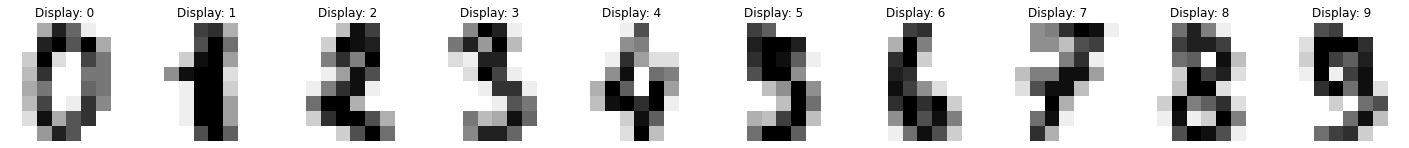

In [183]:
#Loading and displaying digits
digits = load_digits()
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(25, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Display: %i " % label)     

In [184]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)  

#Implementing the Model using Keras

In [185]:
#print(digits.data.shape[1])

#model declaration
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(digits.data.shape[1],), name="layer1"),
    keras.layers.Dense(32, activation='relu', name="layer2"),
    keras.layers.Dense(10, activation='softmax', name="layer3")
])

# compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(X_train, y_train, epochs=20, batch_size=100)

# evaluate model on train set
#train_loss, train_acc = model.evaluate(X_train, y_train)
# evaluate model on test set
#test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/20
13/13 [==============================] - 1s 3ms/step - loss: 5.1055 - accuracy: 0.1687
Epoch 2/20
13/13 [==============================] - 0s 3ms/step - loss: 1.9693 - accuracy: 0.3628
Epoch 3/20
13/13 [==============================] - 0s 3ms/step - loss: 1.2259 - accuracy: 0.6094
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.8592 - accuracy: 0.7239
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.7987
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.8488
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 0.8751
Epoch 8/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.9053
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 0.9212
Epoch 10/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9411
Epoch 11/20
13/13 [

In [186]:
#test
print(model.layers[0].get_weights()[0])

[[-0.1240747   0.11674716  0.05140178 ...  0.06688534 -0.14606327
   0.02216087]
 [-0.21378046 -0.15320867 -0.1431493  ... -0.18794322  0.01534176
   0.09352768]
 [ 0.05307874 -0.15443005  0.06084968 ...  0.02234861 -0.02786798
   0.01940014]
 ...
 [-0.15880005  0.05309869  0.04469525 ... -0.19931349 -0.02653784
   0.10851209]
 [-0.14628382 -0.06160574 -0.10818426 ... -0.18410818  0.16152067
  -0.08436508]
 [-0.01360707  0.15802869  0.04260643 ... -0.20923266 -0.05062271
  -0.0218163 ]]


#Saving the Weights and Biases

In [187]:
# Saving Weights
W1 = model.layers[0].get_weights()[0]
W2 = model.layers[1].get_weights()[0]
W3 = model.layers[2].get_weights()[0]

#Saving Biases
B1 = model.layers[0].get_weights()[1]
B2 = model.layers[1].get_weights()[1]
B3 = model.layers[2].get_weights()[1]

#Implementing the model manually

In [188]:

X = digits.data
y=  digits.target

#Splitting again
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits['target'], test_size=0.3) 

# Defining the activation functions
def relu(x):
    return np.maximum(0, x)

#def sigmoid(x):
#    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

# Forward propagation function
def forward_propagation(X):
    L1 = np.dot(X, W1) + B1
    A1 = relu(L1)
    L2 = np.dot(A1, W2) + B2
    A2 = relu(L2)
    L3 = np.dot(A2, W3) + B3
    A3 = softmax(L3)
    return A3

#Implementing the model
Pred = forward_propagation(X_test)
#print(Pred)

# Computing the accuracy of the predictions
def accuracy(predictions, labels):
    return np.mean(Pred.argmax(axis=1) == labels)
acc = accuracy(Pred, y_test)
print("Accuracy with NumPy: ", acc)



Accuracy:  0.9814814814814815


# Plotting Images for 10 randomn digits

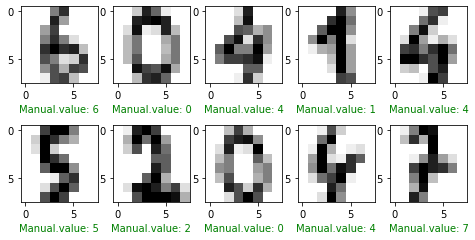

17/17 [==============================] - 0s 4ms/step


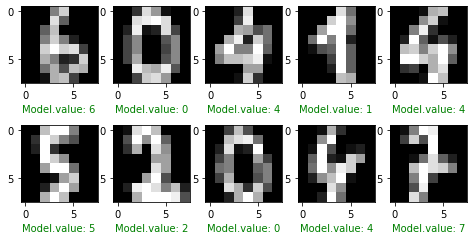

In [189]:
# Plot some examples from the testing set
fig, ax = plt.subplots(2, 5, figsize=(8, 4))

for i, axi in enumerate(ax.flat):
    img1 = X_test[i].reshape(8, 8)
    axi.imshow(img1, cmap='binary')    
    axi.set_xlabel("Manual.value: {}".format(Pred[i].argmax()), color='green')

plt.show()

# Obtain the prediction for those examples from the model
y_pred = model.predict(X_test)

fig, axs = plt.subplots(2, 5, figsize=(8, 4))
axs = axs.flatten()

for i in range(10):
    img = X_test[i].reshape(8, 8)
    axs[i].imshow(img, cmap='gray')    
    axs[i].set_xlabel("Model.value: {}".format(y_pred[i].argmax()), color='green')

plt.show()